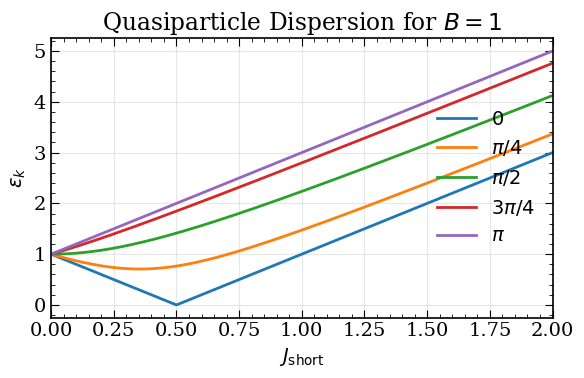

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Parameters -----
B = 0.5
k_values = [0.0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
k_labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
J_min, J_max, J_points = 0.0, 2.0, 800

# ----- Dispersion function -----
def epsilon(k, Jshort, B=1.0):
    return 2.0 * np.sqrt((Jshort - B*np.cos(k))**2 + (B*np.sin(k))**2)

# ----- Aesthetics (publication-friendly) -----
plt.rcParams.update({
    "font.family": "serif",        # 'Times New Roman' if available
    "font.size": 14,
    "axes.linewidth": 1.2,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "legend.frameon": False,
    "pdf.fonttype": 42,            # embed fonts in vector form
})

# ----- Compute curves -----
J = np.linspace(J_min, J_max, J_points)
curves = [epsilon(k, J, B=B) for k in k_values]

# ----- Plot -----
plt.figure(figsize=(6, 4))
for y, lbl in zip(curves, k_labels):
    plt.plot(J, y, linewidth=2.0, label=lbl)

plt.xlabel(r"$J_{\mathrm{short}}$")
plt.ylabel(r"$\epsilon_k$")
plt.title(r"Quasiparticle Dispersion for $B = 1$")
plt.xlim(J_min, J_max)

# Ticks (minor + major)
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(which="both", direction="in", top=True, right=True)
ax.tick_params(which="major", length=6)
ax.tick_params(which="minor", length=3)

plt.legend(loc="center right")

plt.tight_layout()

# ----- Save PDF -----
plt.savefig("dispersion_B1.pdf", format="pdf", bbox_inches="tight")
plt.show()
